# 2.1 Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction <a id='introduction'></a>
In this notebook, we will build on the low-level analysis performed in the 2.0-EDA.ipynb notebook. At this point, we have joined our data into unified sets. We have a dataset all_data.csv that contains the information for all schools from the census, expenditures, and the change, enroll, final, frl datasets. There is also the high_school.csv dataset which only includes the high schools from the all_data and is joined with the coact and remediation datasets. We will be looking at relationships between data that has been provided in each of the datasets and test hypotheses.

Specifically, we will
- Compare federal estimates of population size to school records,
- Compare the number of students in poverty to the number of students receiving free or reduced price lunches as well as the amount of money being spent in support programs
- Examine the performance of students in minorities to make recommendations for outreach programs
- Demonstrate evidence for the effect of ependitures as well as their types on performance

## Table of Contents
* [Introduction](#introduction)
* [1 Load Data](#load)
* [2 Federal and School Record Population Size Comparison](#compare)
* [Conclusion](#conclusion)

## 1 Load Data <a id='load'></a>
We will read in the all_data.csv and the high_school.csv datasets, and preview them.

In [2]:
all_data = pd.read_csv('../data/interim/all_data.csv')
high_school = pd.read_csv('../data/interim/high_school.csv')

In [3]:
all_data.head()

district_id  est_child_poverty  est_total_child  est_total_pop  year  \
0        880.0            22978.0          85901.0       604414.0  2010   
1        880.0            21750.0          88725.0       619968.0  2011   
2        880.0            26358.0          90920.0       634265.0  2012   
3        880.0            22978.0          85901.0       604414.0  2010   
4        880.0            21750.0          88725.0       619968.0  2011   

   child_pov_ratio  child_adult_ratio  county  instruction_total  \
0         0.267494           0.142123  DENVER        438251412.0   
1         0.245139           0.143112  DENVER        445458597.0   
2         0.289903           0.143347  DENVER        474517651.0   
3         0.267494           0.142123  DENVER        438251412.0   
4         0.245139           0.143112  DENVER        445458597.0   

   support_total  ...  pct_amind  pct_asian  pct_black  pct_hisp  pct_white  \
0    369798031.0  ...   0.009326   0.029016   0.009845  0.916580   0.031606   
1    384559117.0  ...   0.009326   0.029016   0.009845  0.916580   0.031606   
2    382873858.0  ...   0.007357   0.026800   0.009984  0.913295   0.037835   
3    369798031.0  ...   0.015015   0.015015   0.270270  0.351351   0.348348   
4    384559117.0  ...   0.015015   0.015015   0.270270  0.351351   0.348348   

     pct_pi  pct_2ormore  pct_fr    district_name  \
0  0.000518     0.003109  0.9300  DENVER COUNTY 1   
1  0.000518     0.003109  0.9300  DENVER COUNTY 1   
2  0.001051     0.003678  0.9296  DENVER COUNTY 1   
3  0.000000     0.000000  1.0000  DENVER COUNTY 1   
4  0.000000     0.000000  1.0000  DENVER COUNTY 1   

                              school  
0        ABRAHAM LINCOLN HIGH SCHOOL  
1        ABRAHAM LINCOLN HIGH SCHOOL  
2        ABRAHAM LINCOLN HIGH SCHOOL  
3  RIDGE VIEW ACADEMY CHARTER SCHOOL  
4  RIDGE VIEW ACADEMY CHARTER SCHOOL  

[5 rows x 44 columns]

In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6218 entries, 0 to 6217
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   district_id              6209 non-null   float64
 1   est_child_poverty        6092 non-null   float64
 2   est_total_child          6092 non-null   float64
 3   est_total_pop            6092 non-null   float64
 4   year                     6218 non-null   int64  
 5   child_pov_ratio          6092 non-null   float64
 6   child_adult_ratio        6092 non-null   float64
 7   county                   6092 non-null   object 
 8   instruction_total        6092 non-null   float64
 9   support_total            6092 non-null   float64
 10  community_total          6092 non-null   float64
 11  other_total              6092 non-null   float64
 12  sum_total                6092 non-null   float64
 13  instruction_per_pupil    6092 non-null   float64
 14  support_per_pupil       

In [69]:
all_data.describe().T

count          mean           std            min  \
district_id              6209.0  1.383974e+03  1.284890e+03      10.000000   
est_child_poverty        6092.0  5.080484e+03  6.793011e+03       5.000000   
est_total_child          6092.0  3.134197e+04  3.227795e+04      32.000000   
est_total_pop            6092.0  1.891349e+05  2.080413e+05     167.000000   
year                     6218.0  2.010996e+03  8.144507e-01    2010.000000   
child_pov_ratio          6092.0  1.715052e-01  8.326659e-02       0.033952   
child_adult_ratio        6092.0  1.736996e-01  3.010923e-02       0.094262   
instruction_total        6092.0  1.558039e+08  1.639947e+08  313302.000000   
support_total            6092.0  1.115000e+08  1.230650e+08  401500.000000   
community_total          6092.0  2.670206e+06  6.744608e+06   -4300.000000   
other_total              6092.0  9.747682e+07  1.562764e+08       0.000000   
sum_total                6092.0  3.674509e+08  4.256540e+08  719324.000000   
instruction_per_pupil    6092.0  5.667979e+03  1.103119e+03    3948.000000   
support_per_pupil        6092.0  4.120709e+03  1.100203e+03     586.000000   
community_per_pupil      6092.0  5.935916e+01  1.130764e+02       0.000000   
other_per_pupil          6092.0  3.259876e+03  5.025687e+03       0.000000   
sum_per_pupil            6092.0  1.310787e+04  5.760691e+03    6090.000000   
school_id                6209.0  4.648866e+03  2.895754e+03      10.000000   
achievement_dir          5566.0  5.569529e-03  6.308663e-01      -1.000000   
growth_dir               5373.0  1.544761e-02  6.763913e-01      -1.000000   
overall_dir              5839.0 -9.076897e-03  6.528876e-01      -1.000000   
school_grade             5446.0  6.833456e+00  2.794917e+00       1.000000   
rank                     5446.0  5.349357e+02  4.089972e+02       1.000000   
read_achievement         5742.0  6.754963e+00  2.783929e+00       1.000000   
math_achievement         5743.0  6.762493e+00  2.789992e+00       1.000000   
write_achievement        5743.0  6.759011e+00  2.790130e+00       1.000000   
science_achievment       5366.0  6.763511e+00  2.785761e+00       1.000000   
overall_weighted_growth  5618.0  6.804913e+00  2.779800e+00       1.000000   
read_growth              5619.0  6.654743e+00  2.763819e+00       1.000000   
math_growth              5623.0  6.696603e+00  2.772483e+00       1.000000   
write_growth             5620.0  6.676690e+00  2.778645e+00       1.000000   
total                    6111.0  4.767069e+02  4.319347e+02       2.000000   
pct_amind                6111.0  9.707448e-03  2.480463e-02       0.000000   
pct_asian                6111.0  2.232392e-02  2.831486e-02       0.000000   
pct_black                6111.0  3.933866e-02  7.478417e-02       0.000000   
pct_hisp                 6111.0  3.109692e-01  2.498733e-01       0.000000   
pct_white                6111.0  5.896311e-01  2.692541e-01       0.000000   
pct_pi                   6111.0  1.966850e-03  4.107285e-03       0.000000   
pct_2ormore              6111.0  2.606278e-02  2.303465e-02       0.000000   
pct_fr                   6095.0  4.425884e-01  2.732545e-01       0.000000   

                                  25%           50%           75%  \
district_id              5.600000e+02  1.040000e+03  1.760000e+03   
est_child_poverty        3.750000e+02  2.622000e+03  6.681000e+03   
est_total_child          2.726000e+03  2.140700e+04  5.458200e+04   
est_total_pop            1.693000e+04  1.088300e+05  2.748700e+05   
year                     2.010000e+03  2.011000e+03  2.012000e+03   
child_pov_ratio          1.065293e-01  1.488374e-01  2.411091e-01   
child_adult_ratio        1.466462e-01  1.691128e-01  1.958840e-01   
instruction_total        1.264187e+07  8.906612e+07  2.878083e+08   
support_total            8.919376e+06  6.457251e+07  1.495366e+08   
community_total          3.730000e+03  2.546380e+05  1.003119e+06   
other_total              4.475206e+06  3.048199e+07  1.281402e+08   

In [5]:
high_school.head()

district_id  school_id  eng_yn  math_yn  read_yn  sci_yn  year  \
0           10        309     0.0      0.0      0.0     0.0  2010   
1           20         15     1.0      0.0      0.0     0.0  2010   
2           20       4108     1.0      0.0      0.0     0.0  2010   
3           20       5043     1.0      0.0      0.0     0.0  2010   
4           20       5816     1.0      0.0      0.0     0.0  2010   

   pct_remediation  est_child_poverty  est_total_child  ...  pct_amind  \
0              NaN             1069.0           6160.0  ...   0.003215   
1              NaN             4446.0          41735.0  ...   0.003063   
2         0.386667             4446.0          41735.0  ...   0.001103   
3         0.235060             4446.0          41735.0  ...   0.003460   
4         0.433566             4446.0          41735.0  ...   0.001703   

   pct_asian  pct_black  pct_hisp  pct_white    pct_pi  pct_2ormore  pct_fr  \
0   0.032154   0.012862  0.710611   0.234727  0.000000     0.006431   0.733   
1   0.025268   0.006891  0.250383   0.706738  0.001531     0.006126   0.155   
2   0.008274   0.002758  0.241589   0.745174  0.000000     0.001103   0.099   
3   0.056846   0.010875  0.156698   0.767672  0.000494     0.003955   0.152   
4   0.010783   0.010216  0.569240   0.403519  0.000568     0.003973   0.379   

        district_name                       school  
0          MAPLETON 1  SKYVIEW ACADEMY HIGH SCHOOL  
1  ADAMS 12 FIVE STAR   ACADEMY OF CHARTER SCHOOLS  
2  ADAMS 12 FIVE STAR          HORIZON HIGH SCHOOL  
3  ADAMS 12 FIVE STAR           LEGACY HIGH SCHOOL  
4  ADAMS 12 FIVE STAR         THORNTON HIGH SCHOOL  

[5 rows x 49 columns]

In [6]:
high_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   district_id              516 non-null    int64  
 1   school_id                516 non-null    int64  
 2   eng_yn                   516 non-null    float64
 3   math_yn                  516 non-null    float64
 4   read_yn                  516 non-null    float64
 5   sci_yn                   516 non-null    float64
 6   year                     516 non-null    int64  
 7   pct_remediation          474 non-null    float64
 8   est_child_poverty        514 non-null    float64
 9   est_total_child          514 non-null    float64
 10  est_total_pop            514 non-null    float64
 11  child_pov_ratio          514 non-null    float64
 12  child_adult_ratio        514 non-null    float64
 13  county                   514 non-null    object 
 14  instruction_total        5

In [70]:
high_school.describe().T

count          mean           std           min  \
district_id              516.0  1.330595e+03  1.000521e+03  1.000000e+01   
school_id                516.0  4.587967e+03  2.806435e+03  1.000000e+01   
eng_yn                   516.0  6.860465e-01  4.645481e-01  0.000000e+00   
math_yn                  516.0  1.414729e-01  3.488469e-01  0.000000e+00   
read_yn                  516.0  2.906977e-01  4.545249e-01  0.000000e+00   
sci_yn                   516.0  2.906977e-02  1.681652e-01  0.000000e+00   
year                     516.0  2.010988e+03  8.148265e-01  2.010000e+03   
pct_remediation          474.0  3.614535e-01  1.643442e-01  0.000000e+00   
est_child_poverty        514.0  4.522543e+03  5.894079e+03  3.300000e+01   
est_total_child          514.0  3.040607e+04  3.117028e+04  2.480000e+02   
est_total_pop            514.0  1.811753e+05  1.972751e+05  1.244000e+03   
child_pov_ratio          514.0  1.592197e-01  7.750645e-02  3.395235e-02   
child_adult_ratio        514.0  1.748711e-01  2.905782e-02  1.086686e-01   
instruction_total        514.0  1.509604e+08  1.585278e+08  1.870887e+06   
support_total            514.0  1.055445e+08  1.150875e+08  8.467100e+05   
community_total          514.0  1.966906e+06  5.652027e+06 -4.300000e+03   
other_total              514.0  8.515022e+07  1.369853e+08  0.000000e+00   
sum_total                514.0  3.436220e+08  3.904530e+08  3.084130e+06   
instruction_per_pupil    514.0  5.395424e+03  6.882991e+02  3.962000e+03   
support_per_pupil        514.0  3.819296e+03  6.511217e+02  2.556000e+03   
community_per_pupil      514.0  4.803113e+01  8.506353e+01  0.000000e+00   
other_per_pupil          514.0  3.107214e+03  3.840641e+03  0.000000e+00   
sum_per_pupil            514.0  1.236992e+04  4.325027e+03  7.694000e+03   
achievement_dir          515.0 -1.941748e-02  5.979957e-01 -1.000000e+00   
growth_dir               514.0  3.112840e-02  5.980833e-01 -1.000000e+00   
overall_dir              515.0  7.766990e-03  4.790736e-01 -1.000000e+00   
school_grade             515.0  7.091262e+00  2.563099e+00  1.000000e+00   
rank                     515.0  1.665087e+02  9.537692e+01  1.000000e+00   
read_achievement         515.0  7.064078e+00  2.478266e+00  1.000000e+00   
math_achievement         515.0  7.588350e+00  2.485260e+00  1.000000e+00   
write_achievement        515.0  7.275728e+00  2.498578e+00  1.000000e+00   
science_achievment       515.0  7.170874e+00  2.492387e+00  1.000000e+00   
overall_weighted_growth  515.0  6.479612e+00  2.162888e+00  1.000000e+00   
read_growth              515.0  6.339806e+00  2.176785e+00  1.000000e+00   
math_growth              515.0  6.539806e+00  2.240385e+00  1.000000e+00   
write_growth             515.0  6.275728e+00  2.172004e+00  1.000000e+00   
graduation_rate          514.0  8.244047e+01  1.116609e+01  2.520000e+01   
total                    515.0  1.124493e+03  6.397500e+02  1.210000e+02   
pct_amind                515.0  9.723771e-03  1.815631e-02  0.000000e+00   
pct_asian                515.0  2.503666e-02  2.529699e-02  0.000000e+00   
pct_black                515.0  3.883982e-02  7.056670e-02  0.000000e+00   
pct_hisp                 515.0  2.858962e-01  2.069063e-01  1.877934e-02   
pct_white                515.0  6.153050e-01  2.273650e-01  2.843016e-02   
pct_pi                   515.0  2.146424e-03  2.426325e-03  0.000000e+00   
pct_2ormore              515.0  2.305214e-02  1.819167e-02  0.000000e+00   
pct_fr                   515.0  3.428550e-01  2.091680e-01  2.450000e-02   

                                  25%           50%           75%  \
district_id              5.500000e+02  1.060000e+03  1.790000e+03   
school_id                2.179000e+03  4.423500e+03  7.114000e+03   
eng_yn                   0.000000e+00  1.000000e+00  1.000000e+00   
math_yn                  0.000000e+00  0.000000e+00  0.000000e+00   
read_yn                  0.000000e+00  0.000000e+00  1.000000e+00   
sci_yn                   0.000000e+00 

In [7]:
num_only_ad = all_data.select_dtypes(include=['int', 'float']).drop(['district_id', 'school_id'], axis=1)
num_only_hs = high_school.select_dtypes(include=['int', 'float']).drop(['district_id', 'school_id'], axis=1)

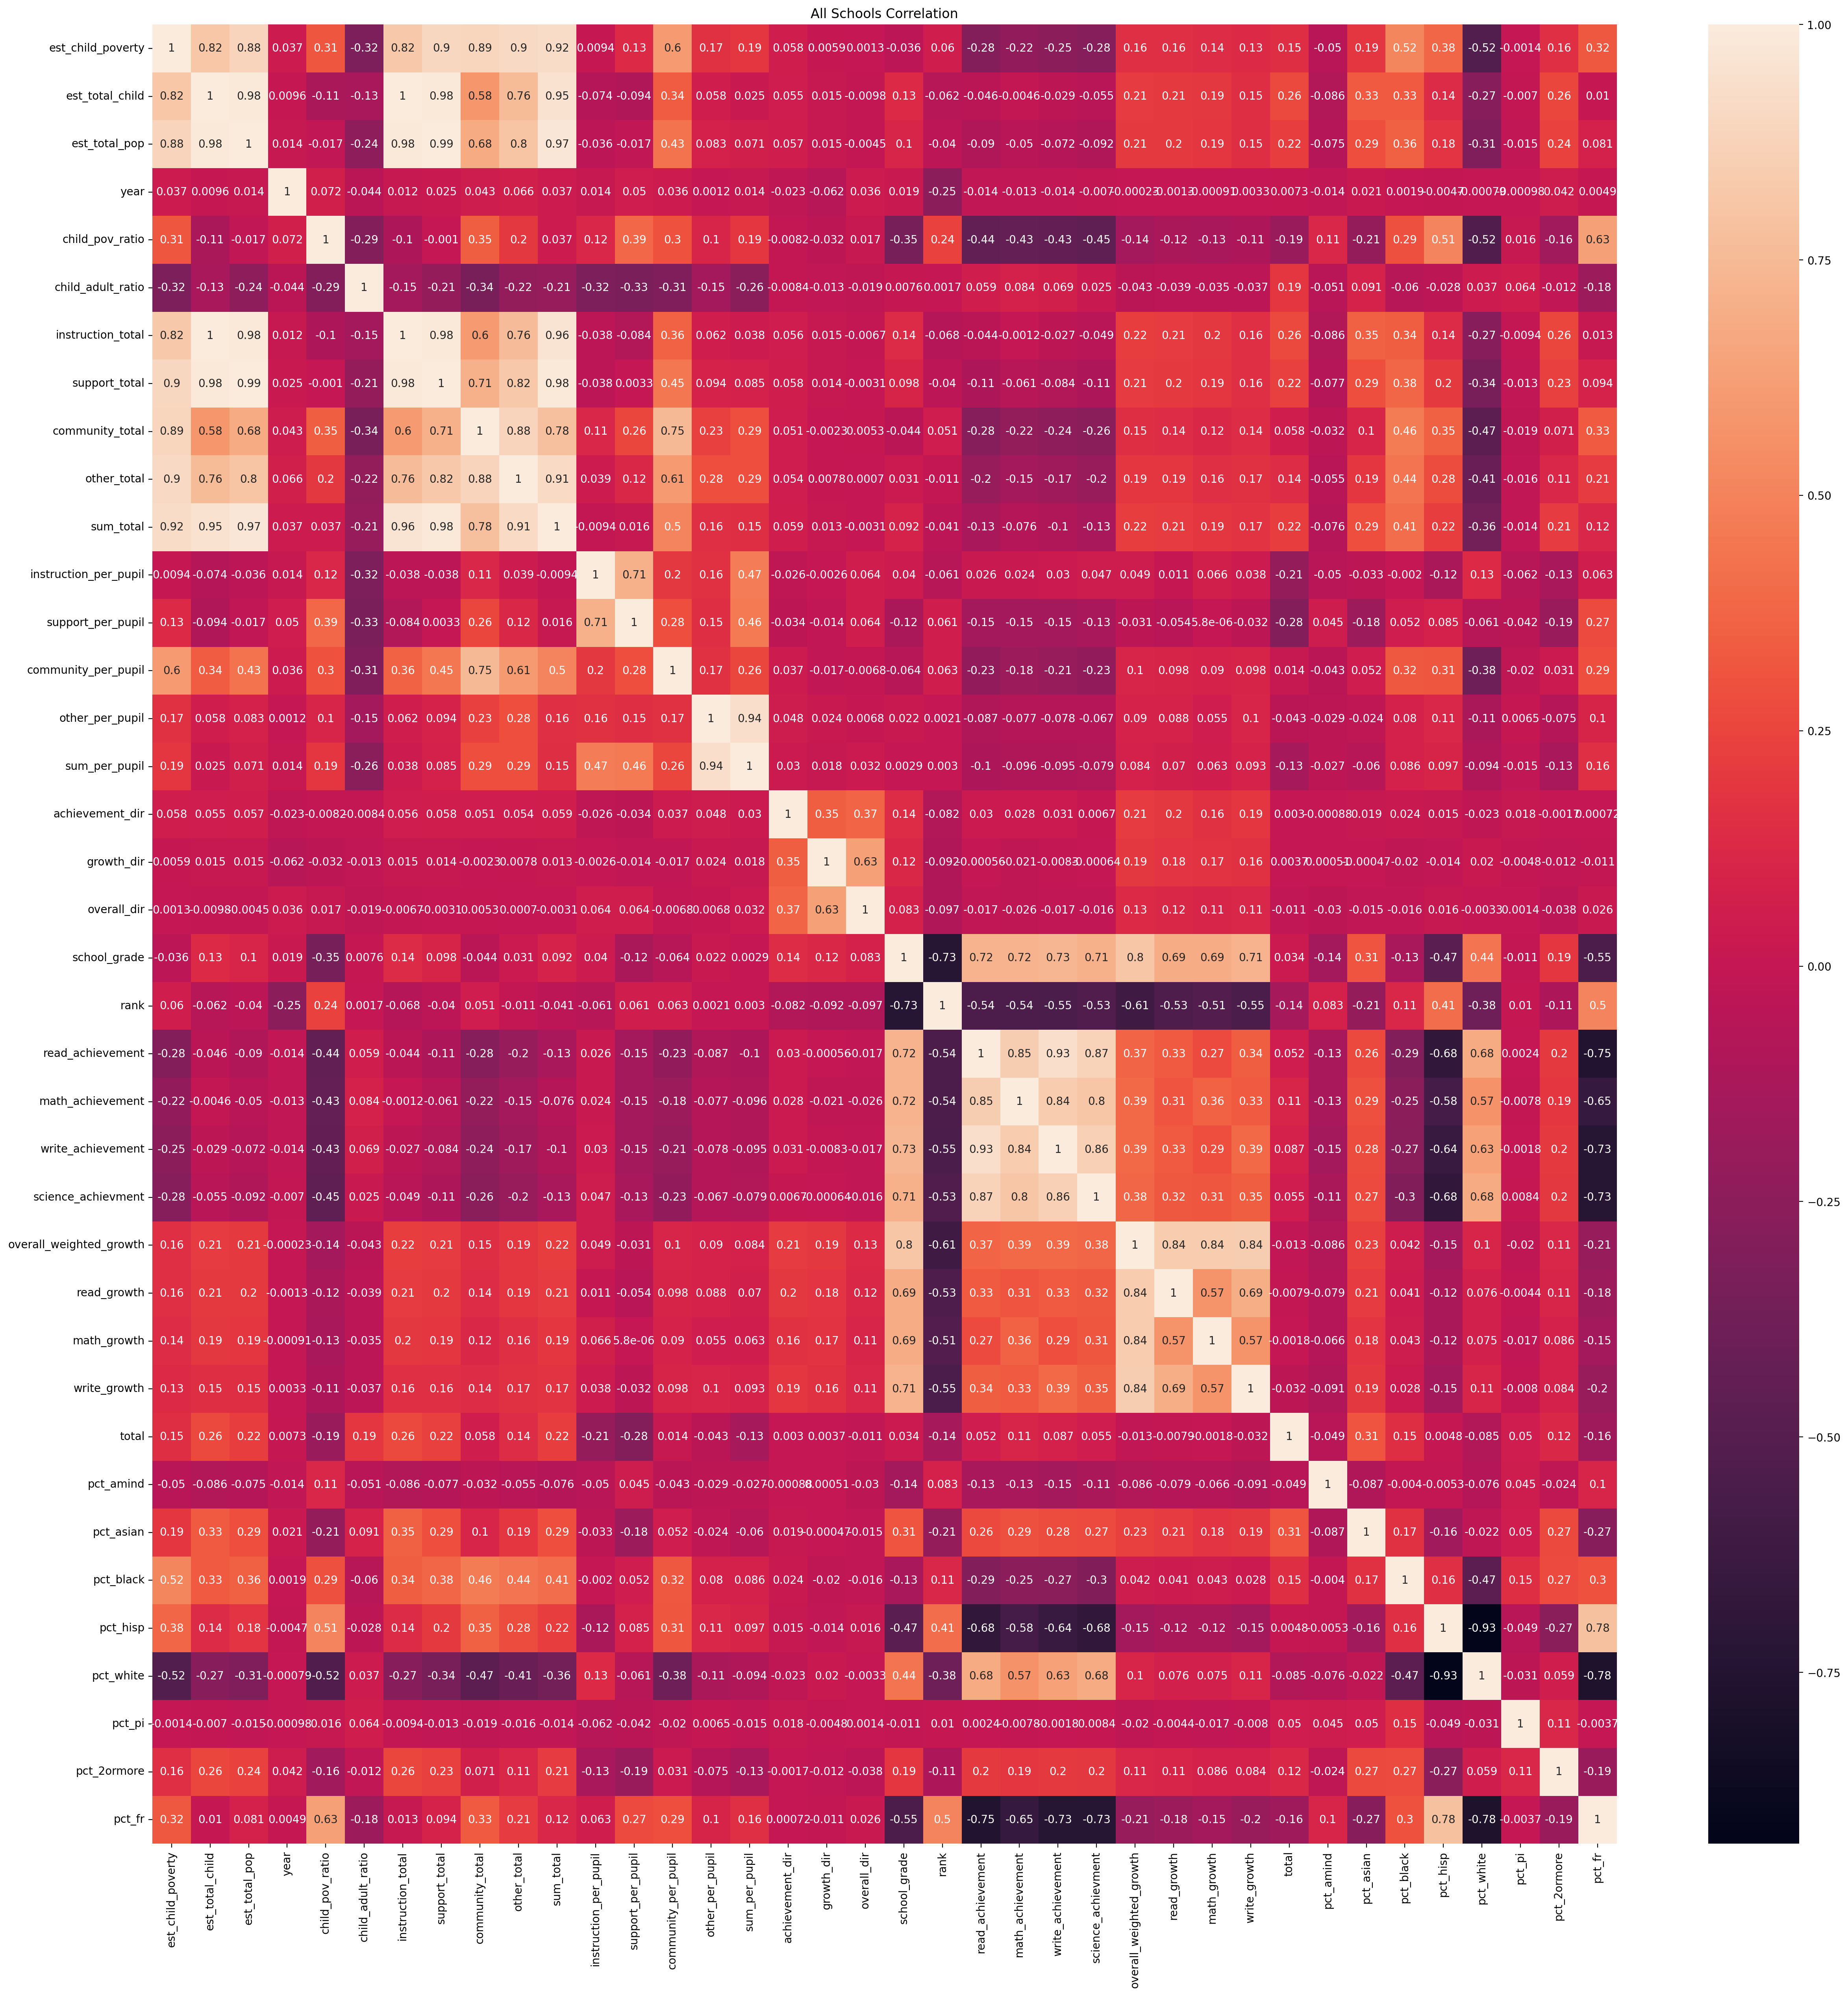

In [8]:
fig, ax = plt.subplots(1,1, figsize=(30,30), dpi=200)
sns.heatmap(num_only_ad.corr(numeric_only=True), ax=ax, annot=True)
ax.set_title('All Schools Correlation')
plt.show()

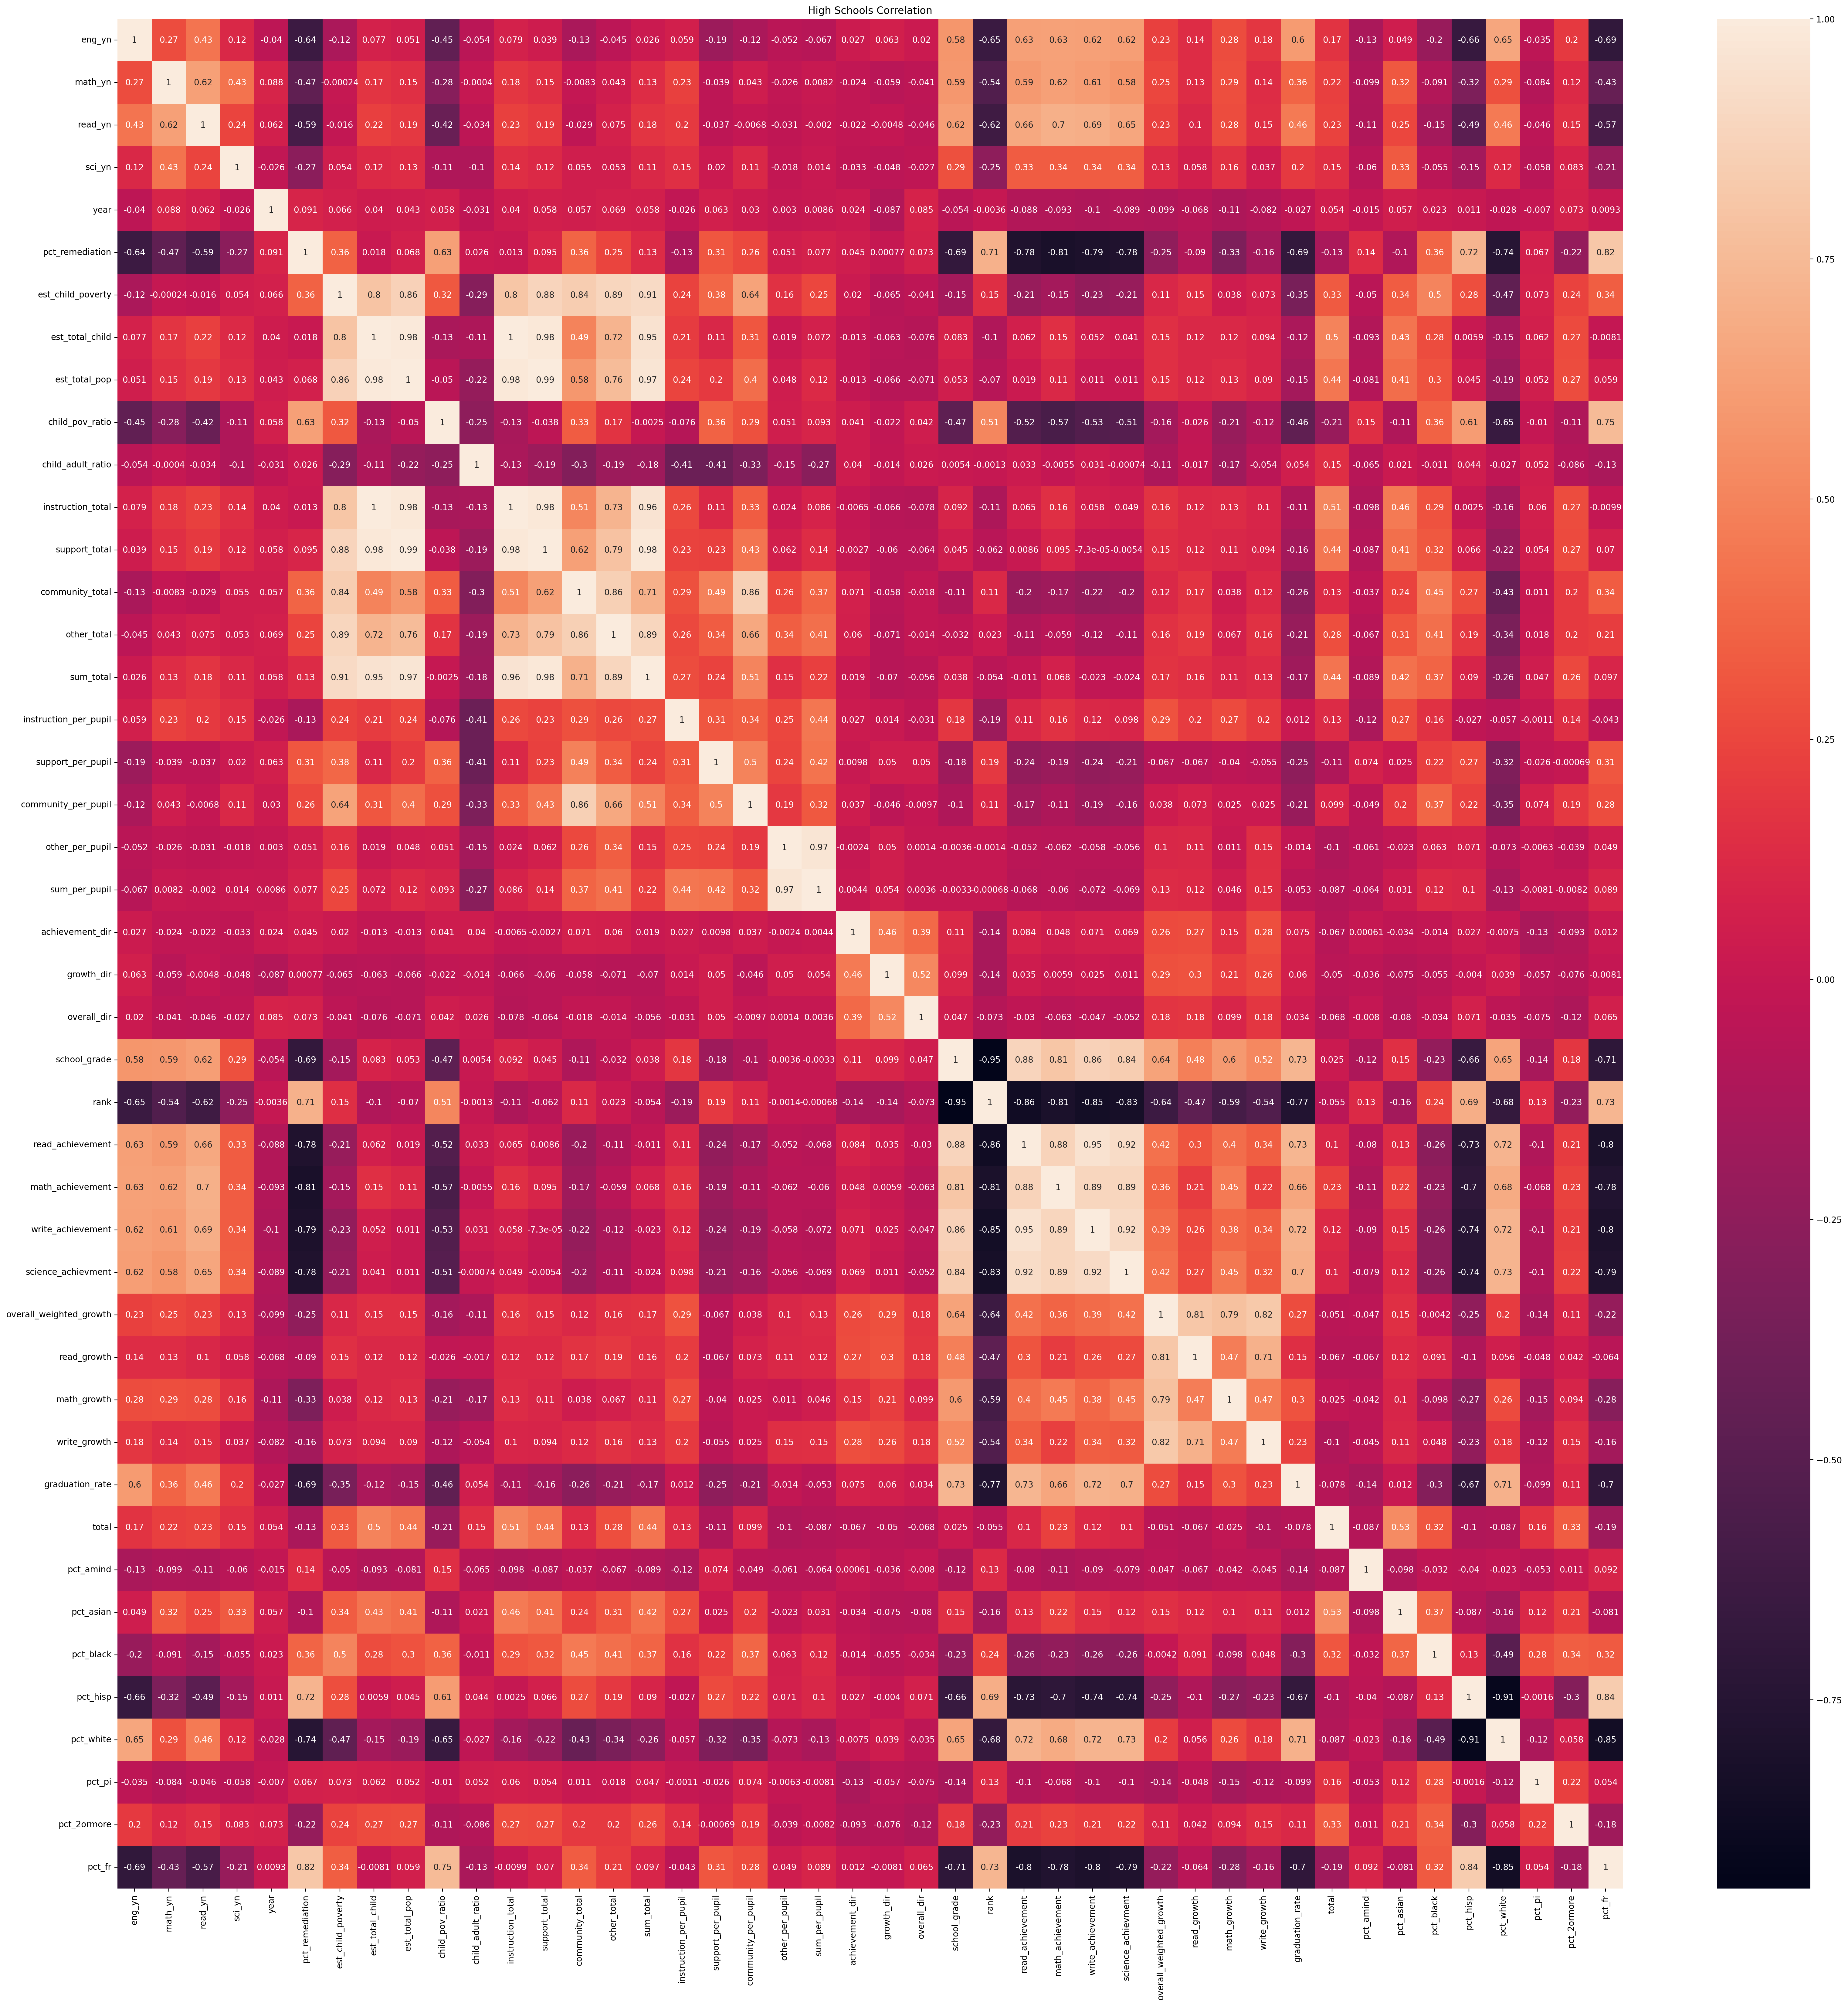

In [9]:
fig, ax = plt.subplots(1,1, figsize=(40,40), dpi=200)
sns.heatmap(num_only_hs.corr(numeric_only=True), ax=ax, annot=True)
ax.set_title('High Schools Correlation')
plt.show()

From these we conlcude that
* Out of all ependitures, instruction spending is most correlated with performance metrics
* Diversity measurements have a surprising amount of correlation with most features
* Federal poverty estimates are highly correlated with total amounts of spending and some correlation with per pupil amounts of spending
* The ratio of children in poverty has high correlation with achievement metrics 

## 2 Federal and School Record Population Size Comparison<a id="compare"></a>

The saipe census datasets provide an estimate of student population size for each district. In the kaggle datasets, the total number of students at a school is reported. We want to offer justification that the saipe and kaggle datasets can be accurately joined. In order to do that, we will take the average of student population sizes for districts at each either and examine the distributions and their differences.

In [10]:
# Takes the average of est_total_child across all years
est_total_child = all_data[['district_id','est_total_child', 'year']].groupby('district_id')['est_total_child'].mean()

# Finds the size of the districts for each year from school sizes,
# Then averages the size of districts across all years
total_child = all_data.groupby(['district_id','year'])['total'].sum().reset_index().groupby('district_id')['total'].mean()

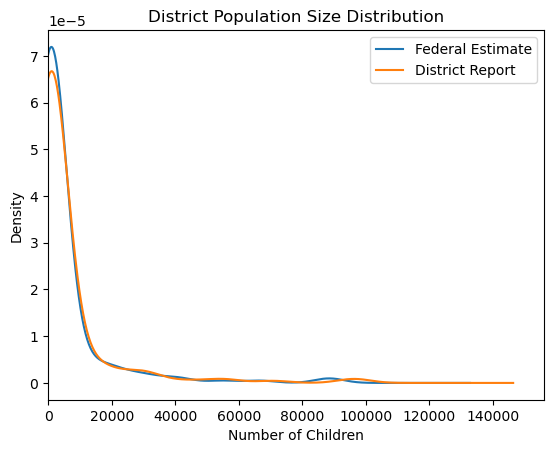

In [11]:
fig, ax = plt.subplots(1,1)
est_total_child.plot.kde(ax=ax, label='Federal Estimate')
total_child.plot.kde(ax=ax, label='District Report')
ax.set_xlim(left=0)
ax.set_title('District Population Size Distribution')
ax.set_xlabel('Number of Children')
ax.legend()
plt.show()

In [12]:
total_child

district_id
10.0      14364.666667
20.0      56995.000000
30.0       8002.333333
40.0      17545.000000
50.0       1175.000000
              ...     
3210.0      918.333333
3220.0      207.666667
3230.0      122.666667
8001.0    13936.666667
9000.0        0.000000
Name: total, Length: 180, dtype: float64

In [13]:
est_total_child

district_id
10.0       6293.710843
20.0      42415.781421
30.0       8404.600000
40.0      16671.587500
50.0       1308.666667
              ...     
3210.0      732.333333
3220.0       92.666667
3230.0       69.666667
8001.0             NaN
9000.0             NaN
Name: est_total_child, Length: 180, dtype: float64

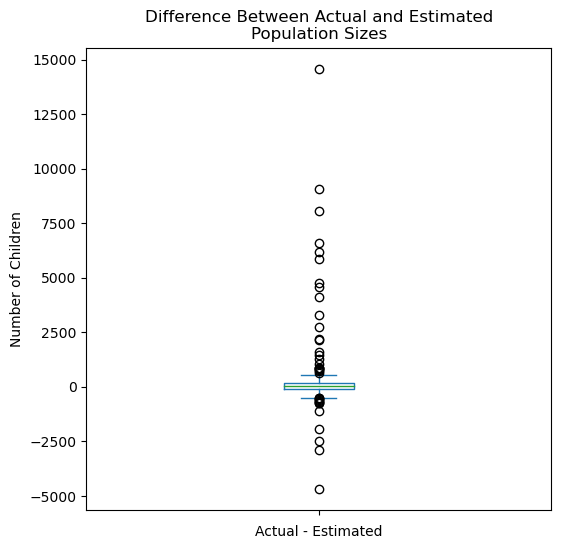

In [14]:
est_act_diff = total_child - est_total_child

plt.figure(figsize=(6,6), dpi=100)
est_act_diff.plot.box()
plt.title('Difference Between Actual and Estimated\nPopulation Sizes')
plt.xlabel('Actual - Estimated')
plt.ylabel('Number of Children')
plt.show()

In [15]:
total_child.describe()

count      180.000000
mean      5394.733333
std      14100.969367
min          0.000000
25%        316.083333
50%        688.000000
75%       2428.000000
max      97550.666667
Name: total, dtype: float64

In [16]:
est_total_child.describe()

count      178.000000
mean      4992.407300
std      13022.252971
min         32.705882
25%        209.519231
50%        616.940559
75%       2551.166667
max      88495.982699
Name: est_total_child, dtype: float64

From this we can be reasonably confident in the synchronicity of the census report and the kaggle datasets. Their distributions appear similar, the difference between them is highly centered at 0, and the max difference between them is only about one standard deviation of the populations.

<AxesSubplot: xlabel='instruction_per_pupil', ylabel='school_grade'>

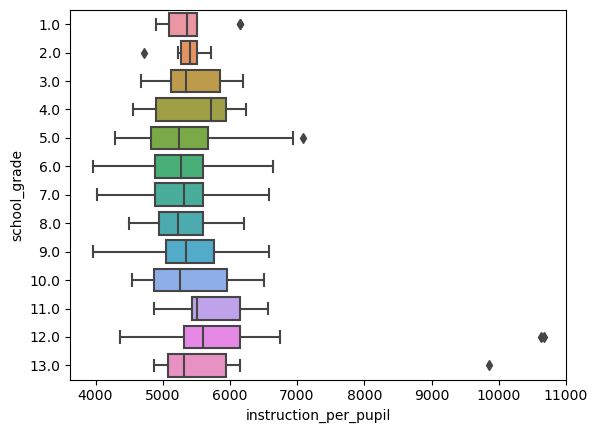

In [44]:
sns.boxplot(data=high_school, y='school_grade', x='instruction_per_pupil', orient='h')

Text(0, 0.5, '')

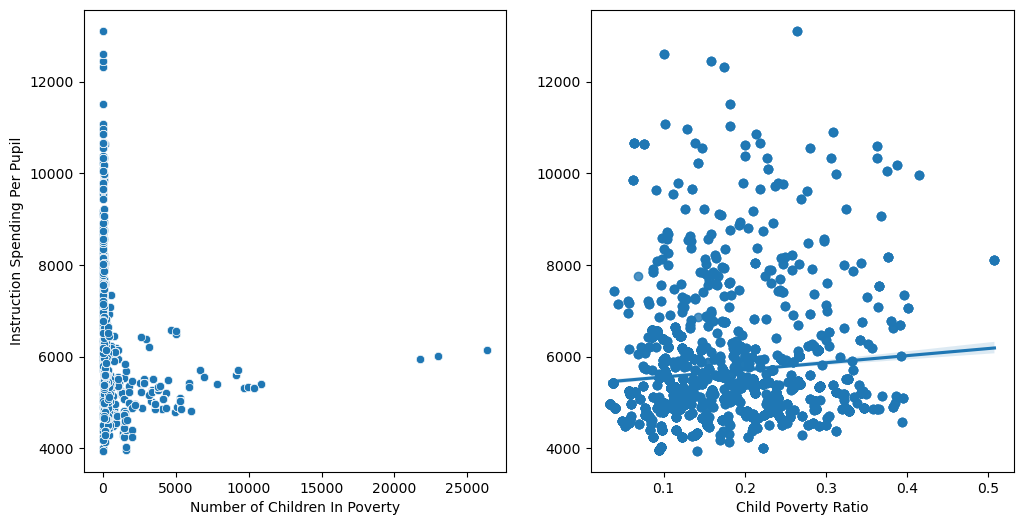

In [43]:
fig, ax = plt.subplots(1,2, figsize=(12,6), dpi=100)
sns.scatterplot(data=all_data, x='est_child_poverty', y='instruction_per_pupil', ax=ax[0])
ax[0].set_ylabel('Instruction Spending Per Pupil')
ax[0].set_xlabel('Number of Children In Poverty')
sns.regplot(data=all_data, x='child_pov_ratio', y='instruction_per_pupil', ax=ax[1])
ax[1].set_xlabel('Child Poverty Ratio')
ax[1].set_ylabel('')


<AxesSubplot: xlabel='child_pov_ratio', ylabel='pct_fr'>

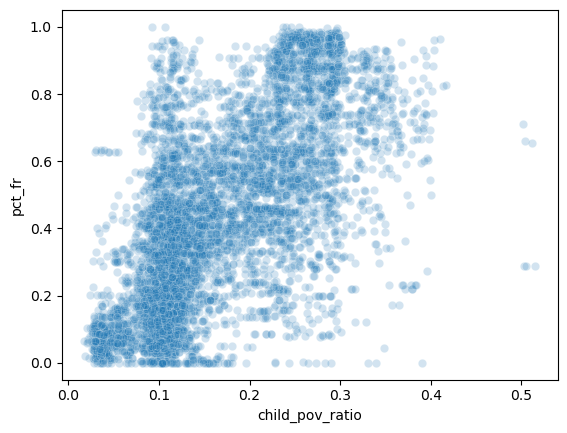

In [75]:
x = all_data['child_pov_ratio'] + np.random.normal(0,0.007,all_data['child_pov_ratio'].shape)
sns.scatterplot(data=all_data, x=x, y='pct_fr', alpha=0.2)

<AxesSubplot: xlabel='instruction_per_pupil', ylabel='support_per_pupil'>

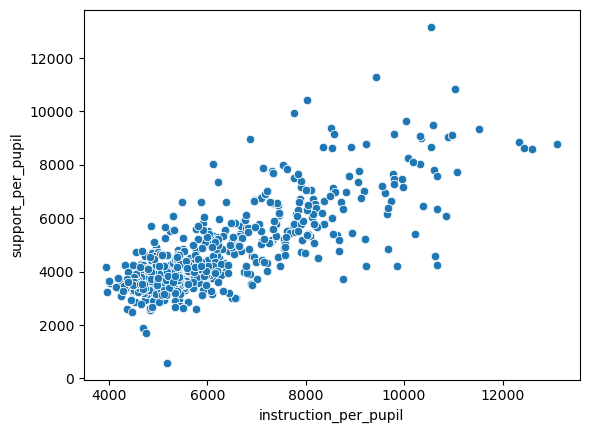

In [72]:
sns.scatterplot(data=all_data, x='instruction_per_pupil', y='support_per_pupil')